## Relação entre `aspectos sociais` e `expectativa de vida `

### IDH e Desemprego

### Análise e Tratamento de dados

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df_expectativa_vida = pd.read_csv('./dataset/expectativa_vida.csv', sep=',')

df_expectativa_vida  = df_expectativa_vida[['Indicator','ParentLocation','Country', 'Period', 'Dim1', 'Value']]

# Pivotando o dataframe para transformar a coluna 'Period' em colunas separadas para os anos desejados
df_expectativa_vida = df_expectativa_vida.pivot_table(index=['Indicator', 'ParentLocation', 'Country', 'Dim1'], columns='Period', values='Value').reset_index()

# Selecionando apenas as colunas desejadas
df_expectativa_vida = df_expectativa_vida[['Indicator', 'ParentLocation', 'Country', 'Dim1', 2000, 2010, 2015, 2019]]
df_expectativa_vida.head()




Period,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
1,Life expectancy at age 60 (years),Africa,Algeria,Female,20.25,21.85,22.33,22.62
2,Life expectancy at age 60 (years),Africa,Algeria,Male,19.36,20.89,21.33,21.53
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
4,Life expectancy at age 60 (years),Africa,Angola,Female,16.01,17.54,18.42,18.55


In [40]:
# Separando os dados com base no indicador - Expectativa de vida ao nascer
df_expectativa_ao_nascer = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at birth (years)']
df_expectativa_ao_nascer= df_expectativa_ao_nascer[df_expectativa_ao_nascer['Dim1'] == 'Both sexes']

df_expectativa_ao_nascer.head()


Period,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
549,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13
552,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06
555,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43
558,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25
561,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70


In [41]:
# Separando os dados com base no indicador - Expectativa de vida aos 60 anos
df_expectativa_aos_60 = df_expectativa_vida[df_expectativa_vida['Indicator'] == 'Life expectancy at age 60 (years)']
df_expectativa_aos_60 = df_expectativa_aos_60[df_expectativa_aos_60['Dim1'] == 'Both sexes']
df_expectativa_aos_60.head()


Period,Indicator,ParentLocation,Country,Dim1,2000,2010,2015,2019
0,Life expectancy at age 60 (years),Africa,Algeria,Both sexes,19.81,21.37,21.81,22.04
3,Life expectancy at age 60 (years),Africa,Angola,Both sexes,14.42,15.97,16.71,16.98
6,Life expectancy at age 60 (years),Africa,Benin,Both sexes,16.08,16.69,17.01,17.40
9,Life expectancy at age 60 (years),Africa,Botswana,Both sexes,12.92,15.26,15.89,16.25
12,Life expectancy at age 60 (years),Africa,Burkina Faso,Both sexes,15.52,16.17,16.44,16.82


In [42]:
df_hdi = pd.read_csv('./dataset/hdi.csv', sep=',', encoding='ISO-8859-1')
df_hdi = df_hdi[['Country', 'HDI Rank', '2000','2010', '2015', '2019']]


# Criando o imputer
imputer = SimpleImputer(strategy='mean')

# Preenchendo os valores faltantes com a média
df_hdi['2000'] = imputer.fit_transform(df_hdi[['2000']])
df_hdi['2010'] = imputer.fit_transform(df_hdi[['2010']])
df_hdi['2015'] = imputer.fit_transform(df_hdi[['2015']])
df_hdi['HDI Rank'] = imputer.fit_transform(df_hdi[['HDI Rank']])

df_hdi.head()


,Country,HDI Rank,2000,2010,2015,2019
0,Afghanistan,169.0,0.350,0.472,0.500,0.511
1,Albania,69.0,0.671,0.745,0.788,0.795
2,Algeria,91.0,0.637,0.721,0.740,0.748
3,Andorra,36.0,0.813,0.837,0.862,0.868
4,Angola,148.0,0.400,0.517,0.572,0.581


In [43]:
df_desemprego = pd.read_csv('./dataset/desemprego.csv', sep=',')
df_desemprego = df_desemprego[['Country', '2000','2010', '2015', '2019']]
print(df_desemprego.size)
df_desemprego.head()

1175


,Country,2000,2010,2015,2019
0,Africa Eastern and Southern,7.72,6.87,6.49,6.91
1,Afghanistan,10.81,11.35,11.13,11.22
2,Africa Western and Central,4.92,4.55,4.63,6.06
3,Angola,4.03,9.43,7.39,7.42
4,Albania,19.03,14.09,17.19,11.47


In [44]:
df_expectativa_ao_nascer = df_expectativa_ao_nascer.rename(columns={2000: 'LifeExp_2000', 2010: 'LifeExp_2010', 2015: 'LifeExp_2015', 2019: 'LifeExp_2019'})
df_hdi = df_hdi.rename(columns={'2000': 'HDI_2000', '2010': 'HDI_2010', '2015': 'HDI_2015', '2019': 'HDI_2019'})
df_desemprego = df_desemprego.rename(columns={'2000': 'Unemployment_2000', '2010': 'Unemployment_2010', '2015': 'Unemployment_2015', '2019': 'Unemployment_2019'})


In [45]:
merged_df_12 = pd.merge(df_expectativa_ao_nascer, df_hdi, on='Country', how='inner')
df = pd.merge(merged_df_12, df_desemprego, on='Country', how='inner')

print(df.size)
df.head(300)

2567


,Indicator,ParentLocation,Country,Dim1,LifeExp_2000,LifeExp_2010,LifeExp_2015,LifeExp_2019,HDI Rank,HDI_2000,HDI_2010,HDI_2015,HDI_2019,Unemployment_2000,Unemployment_2010,Unemployment_2015,Unemployment_2019
0,Life expectancy at birth (years),Africa,Algeria,Both sexes,72.21,75.85,76.54,77.13,91.0,0.637000,0.721,0.740,0.748,29.77,9.96,11.21,10.51
1,Life expectancy at birth (years),Africa,Angola,Both sexes,49.30,58.07,61.72,63.06,148.0,0.400000,0.517,0.572,0.581,4.03,9.43,7.39,7.42
2,Life expectancy at birth (years),Africa,Benin,Both sexes,56.59,60.47,61.96,63.43,158.0,0.416000,0.494,0.532,0.545,0.85,1.04,2.01,1.47
3,Life expectancy at birth (years),Africa,Botswana,Both sexes,45.59,58.14,60.93,62.25,100.0,0.581000,0.663,0.717,0.735,15.88,17.86,20.57,22.61
4,Life expectancy at birth (years),Africa,Burkina Faso,Both sexes,51.64,58.59,60.92,62.70,182.0,0.293000,0.384,0.422,0.452,2.61,3.64,4.32,4.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Life expectancy at birth (years),Western Pacific,Samoa,Both sexes,68.51,69.57,70.04,70.45,111.0,0.651000,0.698,0.707,0.715,4.66,5.73,8.50,8.41
147,Life expectancy at birth (years),Western Pacific,Singapore,Both sexes,78.44,81.70,82.81,83.22,11.0,0.821000,0.909,0.931,0.938,3.70,4.12,3.79,3.10
148,Life expectancy at birth (years),Western Pacific,Solomon Islands,Both sexes,62.51,63.69,64.74,65.25,151.0,0.475000,0.537,0.563,0.567,2.03,1.58,0.73,0.75
149,Life expectancy at birth (years),Western Pacific,Tonga,Both sexes,70.92,72.22,72.33,72.57,104.0,0.675000,0.699,0.720,0.725,4.08,1.74,2.55,3.06


                   LifeExp_2000  LifeExp_2010  LifeExp_2015  LifeExp_2019
HDI_2000               0.860896      0.825360      0.848646      0.847382
HDI_2010               0.891106      0.869915      0.898962      0.900383
HDI_2015               0.871255      0.854159      0.897002      0.892339
HDI_2019               0.870460      0.854067      0.896231      0.893152
Unemployment_2000      0.048448     -0.006887     -0.017772     -0.015635
Unemployment_2010      0.055214     -0.007211      0.012765      0.016582
Unemployment_2015      0.082969      0.020457      0.030892      0.032881
Unemployment_2019     -0.063497     -0.128913     -0.121823     -0.122491


C:\Users\marce\AppData\Local\Temp\ipykernel_10964\966662274.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



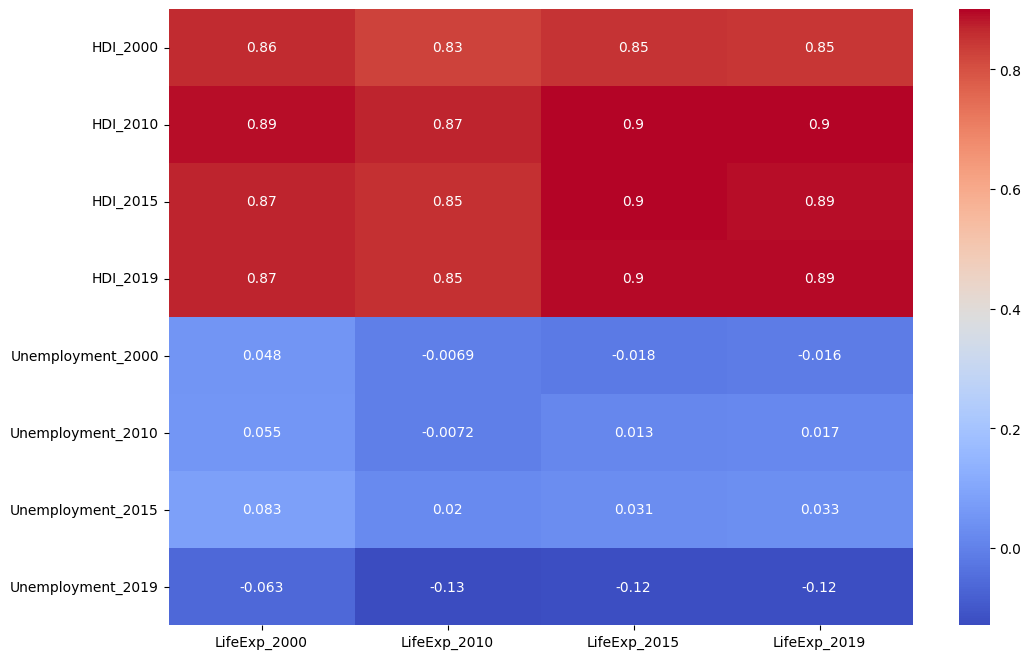

In [46]:
correlation_matrix = df.corr()

# Remova as linhas indesejadas
columns_to_keep = ['LifeExp_2000', 'LifeExp_2010', 'LifeExp_2015', 'LifeExp_2019']
correlation_matrix = correlation_matrix[columns_to_keep]

rows_to_remove = ['HDI Rank', 'LifeExp_2000', 'LifeExp_2010','LifeExp_2015', 'LifeExp_2019']
correlation_matrix = correlation_matrix.drop(rows_to_remove)

print(correlation_matrix)


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()



In [47]:
df.describe()

,LifeExp_2000,LifeExp_2010,LifeExp_2015,LifeExp_2019,HDI Rank,HDI_2000,HDI_2010,HDI_2015,HDI_2019,Unemployment_2000,Unemployment_2010,Unemployment_2015,Unemployment_2019
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,66.921457,70.217417,71.757550,72.806623,95.443709,0.630108,0.683199,0.706682,0.719338,8.335033,7.893576,7.689205,6.908742
std,9.981555,8.853955,7.692528,7.172872,56.051005,0.167871,0.160616,0.155875,0.154211,6.506300,5.788660,5.796361,5.318303
min,43.780000,31.280000,47.670000,50.750000,1.000000,0.262000,0.331000,0.372000,0.394000,0.580000,0.450000,0.170000,0.100000
25%,59.915000,64.065000,64.835000,66.580000,46.500000,0.489000,0.538000,0.571000,0.588000,3.675000,4.015000,3.885000,3.495000
50%,70.340000,72.220000,73.250000,74.070000,95.000000,0.643000,0.715000,0.735000,0.740000,6.280000,6.560000,6.150000,5.210000
75%,74.415000,76.250000,77.495000,77.935000,145.500000,0.759500,0.804000,0.838500,0.841500,11.745000,10.270000,9.420000,8.605000
max,81.120000,82.680000,83.620000,84.260000,189.000000,0.915000,0.941000,0.947000,0.957000,35.460000,27.310000,27.690000,28.470000


### Gráficos

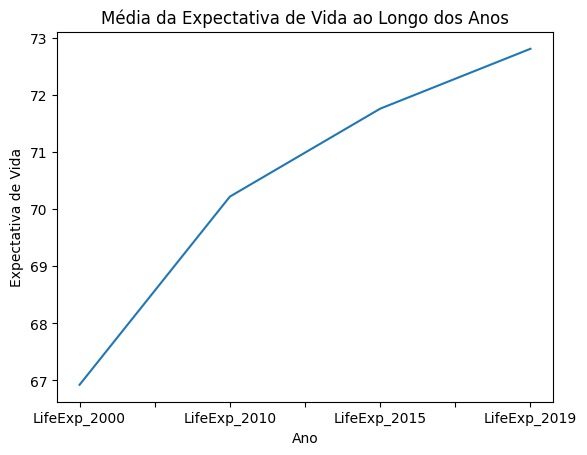

In [48]:
mean_life_exp = df[['LifeExp_2000', 'LifeExp_2010', 'LifeExp_2015', 'LifeExp_2019']].mean()
mean_life_exp.plot()
plt.title("Média da Expectativa de Vida ao Longo dos Anos")
plt.ylabel("Expectativa de Vida")
plt.xlabel("Ano")
plt.show()


In [49]:
px.scatter(df,y='HDI_2000',x='LifeExp_2000',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus HDI in 2000 </b>')


In [50]:
px.scatter(df,y='HDI_2010',x='LifeExp_2010',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus HDI in 2010 </b>')


In [51]:
px.scatter(df,y='HDI_2015',x='LifeExp_2015',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus HDI in 2015 </b>')

In [52]:
px.scatter(df,y='HDI_2019',x='LifeExp_2019',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus HDI in 2019 </b>')

In [53]:
px.scatter(df,y='Unemployment_2000',x='LifeExp_2000',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Unemployment in 2000 </b>')

In [54]:
px.scatter(df,y='Unemployment_2010',x='LifeExp_2010',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Unemployment in 2000 </b>')

In [55]:
px.scatter(df,y='Unemployment_2015',x='LifeExp_2015',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Unemployment in 2015 </b>')

In [56]:
px.scatter(df,y='Unemployment_2019',x='LifeExp_2019',color='Country',template='plotly_dark',opacity=0.6,title='<b> Life Expectancy Versus Unemployment in 2019 </b>')

### Testes de Hipóteses e ICS

In [57]:
# Teste t para amostras relacionadas (mesmos países, anos diferentes)
stat, p = stats.ttest_ind(df["LifeExp_2000"], df["LifeExp_2019"])

print(f"Stat = {stat:.2f}")
print(f"P-valor = {p:.2f}")

if p < 0.05:
    print("Rejeitamos a hipótese nula de que as médias globais em 2000 e 2019 são iguais.")
else:
    print("Não rejeitamos a hipótese nula.")


Stat = -5.88
P-valor = 0.00
Rejeitamos a hipótese nula de que as médias globais em 2000 e 2019 são iguais.


In [58]:
confidence_level = 0.95
degrees_freedom = df["LifeExp_2000"].shape[0] - 1
sample_mean = df["LifeExp_2000"].mean()
sample_standard_error = stats.sem(df["LifeExp_2000"])

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(f"Intervalo de Confiança para Expectativa de Vida Global em 2000: {confidence_interval}")


Intervalo de Confiança para Expectativa de Vida Global em 2000: (65.31645384226839, 68.52646006501637)


In [59]:
continents = df["ParentLocation"].unique()

for continent in continents:
    subset = df[df["ParentLocation"] == continent]
    
    # Teste t
    stat, p = stats.ttest_rel(subset["LifeExp_2000"], subset["LifeExp_2019"])
    print(f"\n{continent} - Teste t entre 2000 e 2019:")
    print(f"Stat = {stat:.2f}")
    print(f"P-valor = {p:.2f}")
    
    if p < 0.05:
        print("Rejeitamos a hipótese nula de que as médias em 2000 e 2019 são iguais.")
    else:
        print("Não rejeitamos a hipótese nula.")
    
    # IC para 2000
    degrees_freedom = subset["LifeExp_2000"].shape[0] - 1
    sample_mean = subset["LifeExp_2000"].mean()
    sample_standard_error = stats.sem(subset["LifeExp_2000"])
    confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
    
    print(f"Intervalo de Confiança para Expectativa de Vida em 2000 ({continent}): {confidence_interval}")



Africa - Teste t entre 2000 e 2019:
Stat = -13.61
P-valor = 0.00
Rejeitamos a hipótese nula de que as médias em 2000 e 2019 são iguais.
Intervalo de Confiança para Expectativa de Vida em 2000 (Africa): (51.6825881418726, 56.2079118581274)

Americas - Teste t entre 2000 e 2019:
Stat = -8.20
P-valor = 0.00
Rejeitamos a hipótese nula de que as médias em 2000 e 2019 são iguais.
Intervalo de Confiança para Expectativa de Vida em 2000 (Americas): (70.60095215370997, 74.57184784629003)

Eastern Mediterranean - Teste t entre 2000 e 2019:
Stat = -8.99
P-valor = 0.00
Rejeitamos a hipótese nula de que as médias em 2000 e 2019 são iguais.
Intervalo de Confiança para Expectativa de Vida em 2000 (Eastern Mediterranean): (65.9396884612347, 72.31089977405942)

Europe - Teste t entre 2000 e 2019:
Stat = -17.92
P-valor = 0.00
Rejeitamos a hipótese nula de que as médias em 2000 e 2019 são iguais.
Intervalo de Confiança para Expectativa de Vida em 2000 (Europe): (72.33875732575298, 75.44217290680517)

So

In [60]:
df['Average_HDI'] = df[['HDI_2000', 'HDI_2010', 'HDI_2015', 'HDI_2019']].mean(axis=1)
df['Average_LifeExp'] = df[['LifeExp_2000', 'LifeExp_2010', 'LifeExp_2015', 'LifeExp_2019']].mean(axis=1)
df['Average_Unemployment'] = df[['Unemployment_2000', 'Unemployment_2010', 'Unemployment_2015', 'Unemployment_2019']].mean(axis=1) 

In [61]:
#Relacionando a média do IDH com a media da expectativa de vida
median_hdi = df['Average_HDI'].median()
low_hdi = df[df['Average_HDI'] <= median_hdi]
high_hdi = df[df['Average_HDI'] > median_hdi]

stat, p = stats.ttest_ind(low_hdi['Average_LifeExp'], high_hdi['Average_LifeExp'])
print(f"Teste t Média IDH-Média Expectativa de Vida: Stat = {stat:.2f}, P-valor = {p:.2f}")

# ICs
sample_standard_error = stats.sem(low_hdi['Average_LifeExp'])
confidence_interval_low = stats.t.interval(confidence_level, len(low_hdi['Average_LifeExp'])-1, loc=low_hdi['Average_LifeExp'].mean(), scale=sample_standard_error)
print(f"IC Média Expectativa de Vida (baixo IDH): {confidence_interval_low}")

sample_standard_error = stats.sem(high_hdi['Average_LifeExp'])
confidence_interval_high = stats.t.interval(confidence_level, len(high_hdi['Average_LifeExp'])-1, loc=high_hdi['Average_LifeExp'].mean(), scale=sample_standard_error)
print(f"IC Média Expectativa de Vida (alto IDH): {confidence_interval_high}")

Teste t Média IDH-Média Expectativa de Vida: Stat = -14.35, P-valor = 0.00
IC Média Expectativa de Vida (baixo IDH): (62.68819128942917, 65.71082186846556)
IC Média Expectativa de Vida (alto IDH): (75.88366255014796, 77.58640411651871)


In [62]:
#Relacionando a meid do desemprego com a média da expectativa de vida

median_unemployment = df['Average_Unemployment'].median()
low_unemployment = df[df['Average_Unemployment'] <= median_unemployment]
high_unemployment = df[df['Average_Unemployment'] > median_unemployment]

stat, p = stats.ttest_ind(low_unemployment['Average_LifeExp'], high_unemployment['Average_LifeExp'])
print(f"\nTeste t Média Desemprego-Média Expectativa de Vida: Stat = {stat:.2f}, P-valor = {p:.2f}")

# ICs
sample_standard_error = stats.sem(low_unemployment['Average_LifeExp'])
confidence_interval_low = stats.t.interval(confidence_level, len(low_unemployment['Average_LifeExp'])-1, loc=low_unemployment['Average_LifeExp'].mean(), scale=sample_standard_error)
print(f"IC Média Expectativa de Vida (baixo desemprego): {confidence_interval_low}")

sample_standard_error = stats.sem(high_unemployment['Average_LifeExp'])
confidence_interval_high = stats.t.interval(confidence_level, len(high_unemployment['Average_LifeExp'])-1, loc=high_unemployment['Average_LifeExp'].mean(), scale=sample_standard_error)
print(f"IC Média Expectativa de Vida (alto desemprego): {confidence_interval_high}")



Teste t Média Desemprego-Média Expectativa de Vida: Stat = -1.77, P-valor = 0.08
IC Média Expectativa de Vida (baixo desemprego): (67.26173206218992, 71.24734688517849)
IC Média Expectativa de Vida (alto desemprego): (69.85634708987105, 73.36885291012895)


## Parte 3

### Regressão

#### Preparação dos Dados

In [63]:

df['LifeExp_Mean'] = df[['LifeExp_2000', 'LifeExp_2010', 'LifeExp_2015', 'LifeExp_2019']].mean(axis=1)
df['HDI_Mean'] = df[['HDI_2000', 'HDI_2010', 'HDI_2015', 'HDI_2019']].mean(axis=1)
df['Unemployment_Mean'] = df[['Unemployment_2000', 'Unemployment_2010', 'Unemployment_2015', 'Unemployment_2019']].mean(axis=1)

# Tratando valores ausentes
imputer = SimpleImputer(strategy='mean')
df[['LifeExp_Mean', 'HDI_Mean', 'Unemployment_Mean']] = imputer.fit_transform(df[['LifeExp_Mean', 'HDI_Mean', 'Unemployment_Mean']])


#### Análise Exploratória de Dados (EDA)

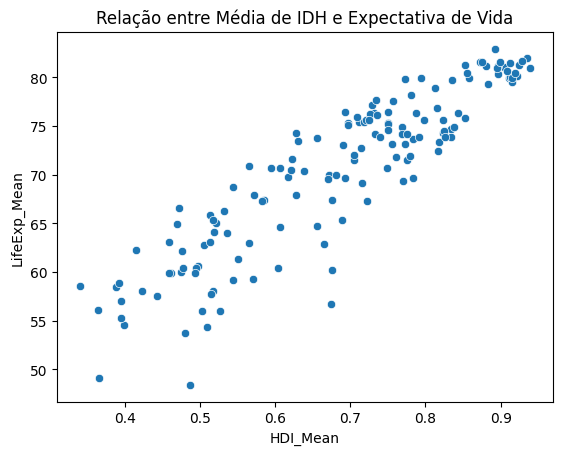

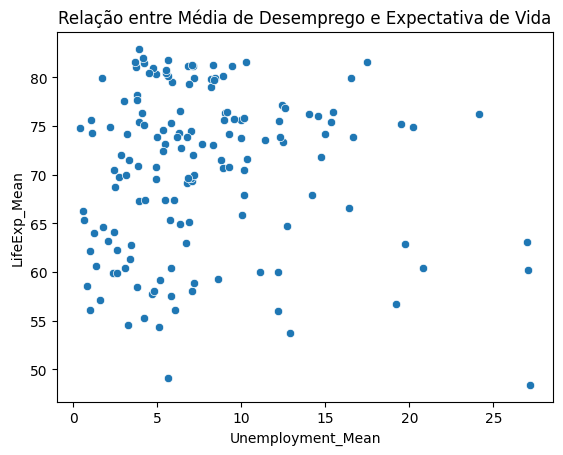

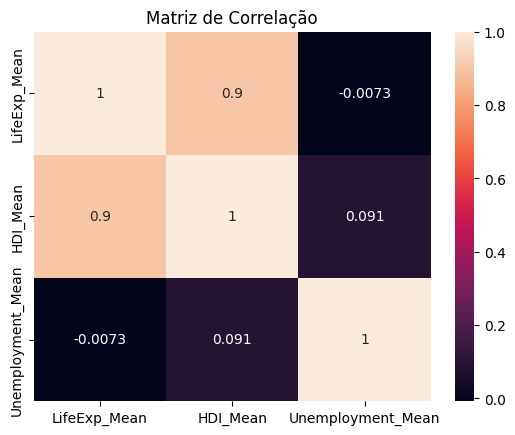

In [64]:
# Gráfico de dispersão entre HDI_Mean e LifeExp_Mean
sns.scatterplot(data=df, x='HDI_Mean', y='LifeExp_Mean')
plt.title('Relação entre Média de IDH e Expectativa de Vida')
plt.show()

# Gráfico de dispersão entre Unemployment_Mean e LifeExp_Mean
sns.scatterplot(data=df, x='Unemployment_Mean', y='LifeExp_Mean')
plt.title('Relação entre Média de Desemprego e Expectativa de Vida')
plt.show()

# Matriz de correlação para as médias
corr_matrix = df[['LifeExp_Mean', 'HDI_Mean', 'Unemployment_Mean']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de Correlação')
plt.show()


#### Modelo de Regressão Linear


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Regressão com IDH
X_hdi = df[['HDI_Mean']]
y = df['LifeExp_Mean']
X_train_hdi, X_test_hdi, y_train, y_test = train_test_split(X_hdi, y, test_size=0.2, random_state=42)

model_hdi = LinearRegression()
model_hdi.fit(X_train_hdi, y_train)

y_pred_hdi = model_hdi.predict(X_test_hdi)
r2_hdi = r2_score(y_test, y_pred_hdi)
print(f"R² Score for HDI: {r2_hdi}")

# Imprimindo a equação de regressão para IDH
print(f"Equação de regressão para IDH: y = {model_hdi.coef_[0]} * x + {model_hdi.intercept_}")

# Regressão com Desemprego
X_unemployment = df[['Unemployment_Mean']]
X_train_unemployment, X_test_unemployment, y_train, y_test = train_test_split(X_unemployment, y, test_size=0.2, random_state=42)

model_unemployment = LinearRegression()
model_unemployment.fit(X_train_unemployment, y_train)

y_pred_unemployment = model_unemployment.predict(X_test_unemployment)
r2_unemployment = r2_score(y_test, y_pred_unemployment)
print(f"R² Score for Unemployment: {r2_unemployment}")

# Imprimindo a equação de regressão para Desemprego
print(f"Equação de regressão para Desemprego: y = {model_unemployment.coef_[0]} * x + {model_unemployment.intercept_}")



R² Score for HDI: 0.8326030081192164
Equação de regressão para IDH: y = 46.90522306772744 * x + 38.35463808520809
R² Score for Unemployment: -0.07389699818714957
Equação de regressão para Desemprego: y = 0.0594376639837065 * x + 70.39777113768525


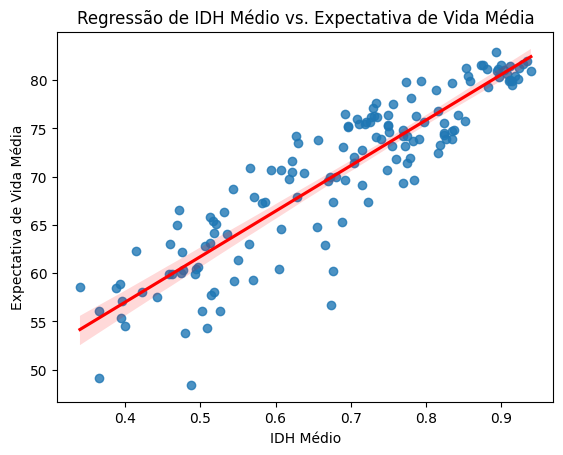

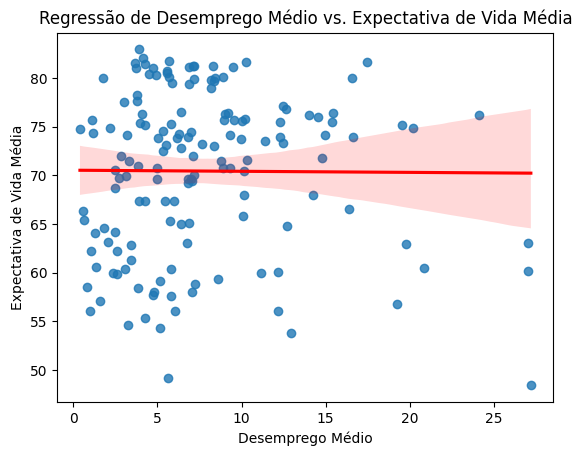

In [66]:
# Gráfico de regressão para IDH
sns.regplot(x='HDI_Mean', y='LifeExp_Mean', data=df, line_kws={"color": "red"})
plt.title('Regressão de IDH Médio vs. Expectativa de Vida Média')
plt.xlabel('IDH Médio')
plt.ylabel('Expectativa de Vida Média')
plt.show()


# Gráfico de regressão para Desemprego
sns.regplot(x='Unemployment_Mean', y='LifeExp_Mean', data=df, line_kws={"color": "red"})
plt.title('Regressão de Desemprego Médio vs. Expectativa de Vida Média')
plt.xlabel('Desemprego Médio')
plt.ylabel('Expectativa de Vida Média')
plt.show()


In [74]:
import statsmodels.api as sm
from scipy.stats import t, norm

# Nível de confiança desejado
conf_level = 0.95


# Para IDH
residuals = y_test - y_pred_hdi
sample_size = len(X_train_hdi)
# Cálculo do erro padrão
std_error = np.sqrt(np.sum(residuals ** 2) / (sample_size - 2))

# Cálculo do valor crítico (z-score) com base no nível de confiança
z = norm.ppf(1 - (1 - conf_level) / 2)

# Acessando o coeficiente do modelo
coef = model_hdi.params[1]

# Cálculo do intervalo de confiança para os coeficientes
lower_bound_coef = coef - z * std_error
upper_bound_coef = coef + z * std_error

print(f"Intervalo de confiança para o coeficiente de IDH: [{lower_bound_coef:.2f}, {upper_bound_coef:.2f}]")


X_hdi = sm.add_constant(df['HDI_Mean'])  # Adiciona o termo de intercepto
y = df['LifeExp_Mean']
model_hdi = sm.OLS(y, X_hdi).fit()
predictions_hdi = model_hdi.get_prediction(X_hdi).summary_frame(alpha=1-conf_level)


print("Intervalos de confiança para os coeficientes do IDH:")
print(model_hdi.conf_int(alpha=1-conf_level))

# ------------------------------------------------------------------------------------

# Para Desemprego

sample_size = len(X_train_unemployment)
# Cálculo do erro padrão
std_error = np.sqrt(np.sum(residuals ** 2) / (sample_size - 2))

# Cálculo do valor crítico (z-score) com base no nível de confiança
z = norm.ppf(1 - (1 - conf_level) / 2)

# Acessando o coeficiente do modelo
coef = model_unemployment.params[1]

# Cálculo do intervalo de confiança para os coeficientes
lower_bound_coef = coef - z * std_error
upper_bound_coef = coef + z * std_error

print(f"Intervalo de confiança para o coeficiente de Desemprego: [{lower_bound_coef:.2f}, {upper_bound_coef:.2f}]")

X_unemployment = sm.add_constant(df['Unemployment_Mean'])  # Adiciona o termo de intercepto
model_unemployment = sm.OLS(y, X_unemployment).fit()
predictions_unemployment = model_unemployment.get_prediction(X_unemployment).summary_frame(alpha=1-conf_level)


print("\nIntervalos de confiança para os coeficientes do Desemprego:")
print(model_unemployment.conf_int(alpha=1-conf_level))



Intervalo de confiança para o coeficiente de IDH: [43.63, 50.69]
Intervalos de confiança para os coeficientes do IDH:
                  0          1
const     35.541809  40.715786
HDI_Mean  43.478616  50.842286
Intervalo de confiança para o coeficiente de Desemprego: [-3.54, 3.52]

Intervalos de confiança para os coeficientes do Desemprego:
                           0          1
const              68.206010  72.815588
Unemployment_Mean  -0.255087   0.233019


### Interpretação dos resultados

`Para o IDH (Índice de Desenvolvimento Humano):`
Intercepto (const): O intervalo de confiança para o intercepto vai de aproximadamente 35.54 a 40.72. Isso significa que, se o IDH médio for 0 (o que não é realmente possível, pois o IDH varia de 0 a 1), a expectativa de vida estimada teria 95% de chance de estar dentro desse intervalo.

IDH_Mean: O intervalo de confiança para o coeficiente do IDH médio vai de aproximadamente 43.48 a 50.84. Isso indica que para cada aumento de uma unidade no IDH médio, a expectativa de vida é estimada aumentar entre 43.48 e 50.84 anos, com 95% de confiança.

`Para o Desemprego`
Intercepto (const): O intervalo de confiança para o intercepto vai de aproximadamente 68.26 a 72.82. Isso sugere que, se a taxa de desemprego média for 0, a expectativa de vida estimada teria 95% de chance de estar dentro desse intervalo.

Unemployment_Mean: O intervalo de confiança para o coeficiente da taxa de desemprego média vai de aproximadamente -0.26 a 0.23. A presença de zero neste intervalo de confiança sugere que não podemos afirmar com certeza se há um impacto positivo ou negativo do desemprego médio na expectativa de vida